In [1]:
import joblib
bundle = joblib.load(r"C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\best_phishing_model_08.pkl")

print(type(bundle["model"]))
print("Trained features:", len(bundle["features"]))
print("Scaler:", type(bundle["scaler"]))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Trained features: 23
Scaler: <class 'sklearn.preprocessing._data.StandardScaler'>


In [2]:
import joblib
bundle = joblib.load(r"C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\best_phishing_model_14_Balanced Model.pkl")

print(type(bundle["model"]))
print("Trained features:", len(bundle["features"]))
print("Scaler:", type(bundle["scaler"]))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Trained features: 25
Scaler: <class 'sklearn.preprocessing._data.StandardScaler'>


In [ ]:
# MODEL SAVING TEST SCRIPT
import joblib
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# 1. Train a small dummy model
X, y = make_classification(n_samples=100, n_features=5, random_state=17)
model = RandomForestClassifier(random_state=17)
model.fit(X, y)

# 2. Prepare save bundle (like your training script)
bundle = {
    "model": model,
    "scaler": None,   # Replace with your trained scaler if any
    "features": [f"f{i}" for i in range(X.shape[1])],
    "label_col": "label"
}

# 3. Save the model
joblib.dump(bundle, "test_model.pkl")
print("✅ Model saved successfully as test_model.pkl")

# 4. Load it back to verify
loaded = joblib.load("test_model.pkl")

# 5. Validate contents
assert "model" in loaded and hasattr(loaded["model"], "predict"), "Model key missing or invalid"
assert "features" in loaded, "Features key missing"
print("✅ Model structure verified:")
print("Model type:", type(loaded["model"]))
print("Features:", loaded["features"])

# 6. Make a quick test prediction
sample = np.random.rand(1, X.shape[1])
pred = loaded["model"].predict(sample)
print("✅ Test prediction:", pred)


✅ Model saved successfully as test_model.pkl
✅ Model structure verified:
Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Features: ['f0', 'f1', 'f2', 'f3', 'f4']
✅ Test prediction: [1]


In [ ]:
# MODEL LOADING TEST SCRIPT
import joblib

bundle = joblib.load(r"C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\best_phishing_model_08.pkl")
print(bundle.keys())
print("Model type:", type(bundle["model"]))
print("Scaler type:", type(bundle["scaler"]))
print("Features:", bundle["features"][:35])  # print all features


dict_keys(['model', 'scaler', 'features', 'label_col'])
Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scaler type: <class 'sklearn.preprocessing._data.StandardScaler'>
Features: ['url_length', 'url_shortening', 'too_many_subdomains', 'https_in_string', 'ssl_tls_validity', 'domain_registration_length', 'external_favicon', 'count_dots', 'suspicious_chars', 'use_script', 'count_third_party_domains', 'use_meta', 'script_external_ratio', 'use_form', 'mailto', 'website_forwarding', 'status_bar_customization', 'popups', 'iframes', 'sensitive_forms', 'domain_age', 'dns_record_count', 'whois_suspicious_tokens']


In [4]:
# ===============================================
# Evaluate Training & Testing Accuracy (Fixed)
# ===============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load your dataset
df = pd.read_csv(r"C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\features_output_FEATURE EXTRACTION_Blackeye_Zphisher_Hiddeneye_Phishtank_allLegits_09_30_2025_EDITED.csv")

# 2. Identify the label column
label_col = "label"  # change if needed

# 3. Select only numeric columns for training
numeric = df.select_dtypes(include=["number"]).copy()

# 4. Ensure label column is present
if label_col not in numeric.columns:
    numeric[label_col] = df[label_col]

# 5. Drop constant (non-informative) columns
numeric = numeric.loc[:, numeric.nunique() > 1]

# 6. Separate features and labels
X = numeric.drop(columns=[label_col])
y = numeric[label_col]

# 7. Fill missing numeric values with their column medians
X = X.fillna(X.median(numeric_only=True))

# 8. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17, stratify=y
)

# 9. Train the model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=17,
    class_weight="balanced"
)
model.fit(X_train, y_train)

# 10. Predict on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 11. Compute accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# 12. Print metrics
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Optional detailed report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Training Accuracy: 1.0000
Testing Accuracy: 0.9835

Confusion Matrix:
 [[  9   2]
 [  2 230]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.99      0.99      0.99       232

    accuracy                           0.98       243
   macro avg       0.90      0.90      0.90       243
weighted avg       0.98      0.98      0.98       243



In [5]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))



Confusion Matrix:
 [[  9   2]
 [  2 230]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.99      0.99      0.99       232

    accuracy                           0.98       243
   macro avg       0.90      0.90      0.90       243
weighted avg       0.98      0.98      0.98       243



In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.99588477 1.         0.99588477 0.98765432 0.65289256]
Average accuracy: 0.9264632860592457


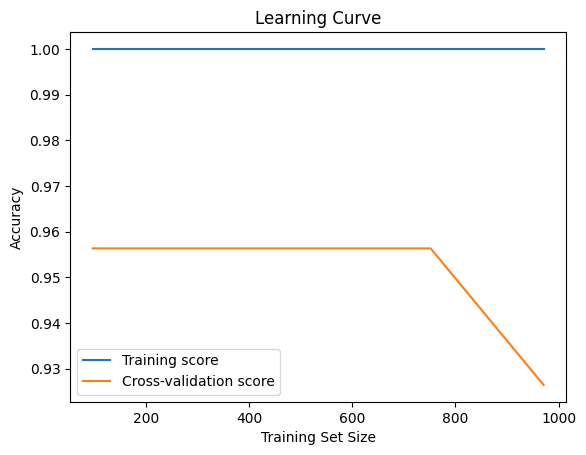

In [7]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()


In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10, random_state=42)


In [ ]:
# Testing Actual Saved Model from GUI Predictions
import joblib

bundle = joblib.load(r"C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\best_phishing_model_14_Balanced Model.pkl")
print(bundle.keys())
print("Model type:", type(bundle["model"]))
print("Scaler type:", type(bundle["scaler"]))
print("Features:", bundle["features"][:35])  # #35 is all features complete list


dict_keys(['model', 'scaler', 'features', 'label_col'])
Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Scaler type: <class 'sklearn.preprocessing._data.StandardScaler'>
Features: ['url_length', 'url_shortening', 'redirection_symbol', 'hyphen_in_domain', 'too_many_subdomains', 'https_in_string', 'ssl_tls_validity', 'domain_registration_length', 'external_favicon', 'count_dots', 'suspicious_chars', 'use_script', 'count_third_party_domains', 'use_meta', 'script_external_ratio', 'use_form', 'mailto', 'website_forwarding', 'status_bar_customization', 'popups', 'iframes', 'sensitive_forms', 'domain_age', 'dns_record_count', 'whois_suspicious_tokens']


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib, pandas as pd, numpy as np

bundle = joblib.load(r"C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\best_phishing_model_14_Balanced Model.pkl")
model = bundle["model"]
scaler = bundle["scaler"]
features = bundle["features"]
label_col = bundle["label_col"]

df = pd.read_csv(r"C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\features_output_FEATURE EXTRACTION_Blackeye_Zphisher_Hiddeneye_Phishtank_allLegits_09_30_2025_EDITED.csv")   # ground-truth labeled test data
X = df[features].fillna(df[features].median())
y = df[label_col].astype(int)
X_arr = scaler.transform(X) if scaler is not None else X.values

y_pred = model.predict(X_arr)
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion matrix:\n", confusion_matrix(y, y_pred))
print("Classification report:\n", classification_report(y, y_pred))

# If model supports predict_proba and it's binary:
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_arr)[:, 1]
    try:
        print("ROC AUC:", roc_auc_score(y, y_proba))
    except Exception:
        pass


Accuracy: 0.9563426688632619
Confusion matrix:
 [[   0   53]
 [   0 1161]]
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.96      1.00      0.98      1161

    accuracy                           0.96      1214
   macro avg       0.48      0.50      0.49      1214
weighted avg       0.91      0.96      0.94      1214

ROC AUC: 0.23165618448637312


c:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Osias\O

In [ ]:
# Cross-validation / stability test
from sklearn.model_selection import cross_val_score
import joblib, pandas as pd
bundle = joblib.load(r"C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\best_phishing_model_14_Balanced Model.pkl")
model = bundle["model"]
features = bundle["features"]
df = pd.read_csv(r"C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\features_output_FEATURE EXTRACTION_Blackeye_Zphisher_Hiddeneye_Phishtank_allLegits_09_30_2025_EDITED.csv")
X = df[features].fillna(df[features].median())
y = df[bundle["label_col"]]

scores = cross_val_score(model, X, y, cv=5, scoring="f1")
print("CV F1 scores:", scores)
print("Mean CV F1:", scores.mean())


CV F1 scores: [0.99785867 1.         0.99784946 0.99357602 0.77894737]
Mean CV F1: 0.9536463040588277


In [16]:
# Unit tests / automated tests (CI)
def test_model_loads():
    bundle = joblib.load(r"C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\best_phishing_model_14_Balanced Model.pkll")
    assert "model" in bundle
    assert callable(getattr(bundle["model"], "predict"))


In [ ]:
# Performance (latency & memory) test
import time
t0 = time.time()
model.predict(X_arr[:1])
print("Single predict ms:", (time.time()-t0)*1000)


Single predict ms: 3.2868385314941406


c:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


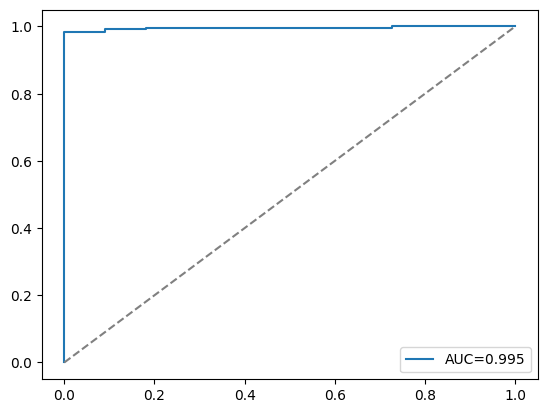

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.legend()
plt.show()


In [6]:
# TC-6: False Positive / False Negative Rate Test

import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# 1. Load the trained phishing detection model dictionary
loaded_data = joblib.load(
    r'C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\best_phishing_model_14_Balanced Model.pkl'
)

# 2. Extract the actual trained model from the dictionary
model = loaded_data['model']   # ✅ Access the classifier

# 3. Load the mixed phishing and legitimate test dataset
test_data = pd.read_csv(
    r'C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\features_output_FEATURE EXTRACTION_Blackeye_Zphisher_Hiddeneye_Phishtank_allLegits_09_30_2025_EDITED.csv'
)

# 4. Split dataset
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# 5. Predict using the model
y_pred = model.predict(X_test)

# 6. Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# 7. Compute rates
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

# 8. Display results
print("=== TC-6: False Positive / False Negative Rate Test ===")
print(f"True Positives : {tp}")
print(f"True Negatives : {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

print(f"\nFalse Positive Rate (FPR): {false_positive_rate * 100:.2f}%")
print(f"False Negative Rate (FNR): {false_negative_rate * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Legitimate", "Phishing"]))

# 9. Pass/Fail check
if false_positive_rate <= 0.10 and false_negative_rate <= 0.15:
    print("\n✅ TEST RESULT: PASSED (Model performance within acceptable limits)")
else:
    print("\n❌ TEST RESULT: FAILED (Model exceeds expected error thresholds)")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- backlinks
- blacklist
- google_index
- ip_in_url
- known_logo
- ...


In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Load model dictionary
data = joblib.load(
    r'C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\best_phishing_model_14_Balanced Model.pkl'
)

# Extract model and feature names
model = data['model']
trained_features = data['features']   # ✅ The exact columns used during training

# Load test dataset
test_data = pd.read_csv(
    r'C:\Users\Osias\OneDrive\Documents\CAPSTONE2_Codes_UIUX_GExtension\features_output_FEATURE EXTRACTION_Blackeye_Zphisher_Hiddeneye_Phishtank_allLegits_09_30_2025_EDITED.csv'
)

# Ensure all training features exist in the test dataset
missing = set(trained_features) - set(test_data.columns)
extra = set(test_data.columns) - set(trained_features)

print("Missing features:", missing)
print("Extra features:", extra)

# Keep only the trained feature columns, in correct order
X_test = test_data[trained_features]

# Extract labels
y_test = test_data['label']

# Predict
y_pred = model.predict(X_test)

# Evaluate
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print("\n=== TC-6: False Positive / False Negative Rate Test ===")
print(f"True Positives : {tp}")
print(f"True Negatives : {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"FPR: {false_positive_rate*100:.2f}% | FNR: {false_negative_rate*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Legitimate", "Phishing"]))
